In [1]:
import pandas as pd
import numpy as np

***LOAD THE DATA***

In [2]:
df =pd.read_csv('/content/Rocketium AI_ML Internship Assignment - 2 - Training dataset.csv')

**BASIC DATA EVALUATION**

In [3]:
df.head()

date        company name  spend  impressions  likecount  \
0  2023-09-05  schneider-electric   5.85          479         31   
1  2023-09-01  schneider-electric   1.80         3880        224   
2  2023-09-04  schneider-electric   2.32          785         55   
3  2023-09-04  schneider-electric   3.94          658         54   
4  2023-09-04  schneider-electric   3.89         2568        168   

   commentcount  repostcount  total engagements  conversion action  ...  \
0             0            2                 33           7   Post  ...   
1             1            9                234           0   Post  ...   
2             1           16                 72          11   Post  ...   
3             1            5                 60           8   Post  ...   
4             1            5                174          25   Post  ...   

          voice sentiment text area % empty space %           topic language  \
0  Professional  Positive        0.00         > 40%       Offerings  English   
1           NaN       NaN        1.85         > 40%       Offerings  English   
2  Professional  Positive        0.00         > 40%  Sustainability  English   
3           NaN       NaN        0.00         > 40%  Sustainability  English   
4           NaN       NaN        1.05    10% to 20%  Sustainability  English   

  # faces # persons  # objects  # text length  
0       0         0          0            NaN  
1       0         0          1       40 to 60  
2       0         0          0            NaN  
3       0         0          0            NaN  
4  2 to 4    2 to 4  5 or more       20 to 40  

[5 rows x 57 columns]

In [4]:
df.shape

(1054, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1054 non-null   object 
 1   company name                        1054 non-null   object 
 2   spend                               1054 non-null   float64
 3   impressions                         1054 non-null   int64  
 4   likecount                           1054 non-null   int64  
 5   commentcount                        1054 non-null   int64  
 6   repostcount                         1054 non-null   int64  
 7   total engagements                   1054 non-null   int64  
 8   conversion                          1054 non-null   int64  
 9   action                              1054 non-null   object 
 10  type                                1054 non-null   object 
 11  posturl                             1054 no

In [6]:
df.isnull().sum()

date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects    

**Remove 'NA' values**

In [7]:
df.replace('NA', pd.NA, inplace=True)

# Function to fill missing values with mean for numerical columns and mode for categorical columns
def fill_missing_with_mean_or_mode(column_name):
    if df[column_name].dtype == 'float64' or df[column_name].dtype == 'int64':
        mean_value = df[column_name].mean()
        df[column_name].fillna(mean_value, inplace=True)
    else:
        mode_value = df[column_name].mode()[0]
        df[column_name].fillna(mode_value, inplace=True)

# Iterate through columns and fill missing values with mean or mode
for column in df.columns:
    fill_missing_with_mean_or_mode(column)

# Display the updated dataset
print(df)


            date         company name   spend  impressions  likecount  \
0     2023-09-05   schneider-electric    5.85          479         31   
1     2023-09-01   schneider-electric    1.80         3880        224   
2     2023-09-04   schneider-electric    2.32          785         55   
3     2023-09-04   schneider-electric    3.94          658         54   
4     2023-09-04   schneider-electric    3.89         2568        168   
...          ...                  ...     ...          ...        ...   
1049  2023-08-04  rockwell-automation    0.89          536         34   
1050  2023-08-08  rockwell-automation    1.88          154         12   
1051  2023-08-04  rockwell-automation  713.23        61614        622   
1052  2023-08-08  rockwell-automation   15.41         1000         32   
1053  2023-08-18  rockwell-automation   32.46         1743         64   

      commentcount  repostcount  total engagements  conversion action  ...  \
0                0            2              

In [8]:
df.isna().sum()

date                                  0
company name                          0
spend                                 0
impressions                           0
likecount                             0
commentcount                          0
repostcount                           0
total engagements                     0
conversion                            0
action                                0
type                                  0
posturl                               0
postcontent                           0
profileurl                            0
videourl                              0
sharedposturl                         0
created_at                            0
size                                  0
url                                   0
number of faces                       0
face emotion                          0
face position                         0
face area percentage %                0
objects                               0
number of objects                     0


In [9]:
# Display the number of duplicate rows
print("Number of duplicate rows before removal:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Display the number of duplicate rows after removal
print("Number of duplicate rows after removal:", df.duplicated().sum())

# Display the updated dataset
print(df)


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
            date         company name   spend  impressions  likecount  \
0     2023-09-05   schneider-electric    5.85          479         31   
1     2023-09-01   schneider-electric    1.80         3880        224   
2     2023-09-04   schneider-electric    2.32          785         55   
3     2023-09-04   schneider-electric    3.94          658         54   
4     2023-09-04   schneider-electric    3.89         2568        168   
...          ...                  ...     ...          ...        ...   
1049  2023-08-04  rockwell-automation    0.89          536         34   
1050  2023-08-08  rockwell-automation    1.88          154         12   
1051  2023-08-04  rockwell-automation  713.23        61614        622   
1052  2023-08-08  rockwell-automation   15.41         1000         32   
1053  2023-08-18  rockwell-automation   32.46         1743         64   

      commentcount  repostcount  total

**LABEL ENCODING(TO CHANGE CATEGORICAL VALUES INTO NUMERICAL VALUES)**

In [45]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())


   date  company name  spend  impressions  likecount  commentcount  \
0    34             5   5.85          479         31             0   
1    30             5   1.80         3880        224             1   
2    33             5   2.32          785         55             1   
3    33             5   3.94          658         54             1   
4    33             5   3.89         2568        168             1   

   repostcount  total engagements  conversion  action  ...  voice  sentiment  \
0            2                 33           7       1  ...      1          1   
1            9                234           0       1  ...      0          1   
2           16                 72          11       1  ...      1          1   
3            5                 60           8       1  ...      0          1   
4            5                174          25       1  ...      0          1   

   text area %  empty space %  topic  language  # faces  # persons  # objects  \
0         0.00   

**STANDARDIZATION**

In [49]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns in the encoded dataset
numeric_columns_encoded = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Use StandardScaler for numeric columns in the encoded dataset
scaler_encoded = StandardScaler()
df[numeric_columns_encoded] = scaler_encoded.fit_transform(df[numeric_columns_encoded])

print(df)

          date  company name     spend  impressions  likecount  commentcount  \
0     1.157588      0.170195 -0.165501    -0.215512  -0.485009     -0.332395   
1     0.813389      0.170195 -0.168734    -0.165299   0.077254     -0.218239   
2     1.071538      0.170195 -0.168319    -0.210994  -0.415090     -0.218239   
3     1.071538      0.170195 -0.167026    -0.212869  -0.418003     -0.218239   
4     1.071538      0.170195 -0.167066    -0.184669  -0.085889     -0.218239   
...        ...           ...       ...          ...        ...           ...   
1049 -1.509951     -0.383464 -0.169460    -0.214670  -0.476269     -0.218239   
1050 -1.251802     -0.383464 -0.168670    -0.220310  -0.540361     -0.332395   
1051 -1.509951     -0.383464  0.399129     0.687100   1.236741     -0.104083   
1052 -1.251802     -0.383464 -0.157870    -0.207820  -0.482096     -0.332395   
1053 -0.391305     -0.383464 -0.144261    -0.196850  -0.388871     -0.332395   

      repostcount  total engagements  c

**FINDING & HANDLING THE OUTLIERS**

In [81]:
# Function to handle outliers using IQR method for encoded data
def handle_outliers_encoded(column_name):
    # Calculate the IQR for the column in the encoded dataset
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replacing the outliers with the upper or lower bound in the encoded dataset
    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Iterating through numeric columns in the encoded dataset and handle outliers
for column in numeric_columns_encoded:
    handle_outliers_encoded(column)

# Display the updated encoded dataset after outlier handling
print(df)


          date  company name     spend  impressions  likecount  commentcount  \
0     1.157588      0.170195 -0.165501    -0.215512  -0.485009     -0.332395   
1     0.813389      0.170195 -0.168734    -0.165299   0.077254     -0.218239   
2     1.071538      0.170195 -0.168319    -0.210994  -0.415090     -0.218239   
3     1.071538      0.170195 -0.167026    -0.212869  -0.418003     -0.218239   
4     1.071538      0.170195 -0.167066    -0.184669  -0.085889     -0.218239   
...        ...           ...       ...          ...        ...           ...   
1049 -1.509951     -0.383464 -0.169460    -0.214670  -0.476269     -0.218239   
1050 -1.251802     -0.383464 -0.168670    -0.220310  -0.540361     -0.332395   
1051 -1.509951     -0.383464 -0.003854     0.040589   0.882777     -0.104083   
1052 -1.251802     -0.383464 -0.157870    -0.207820  -0.482096     -0.332395   
1053 -0.391305     -0.383464 -0.144261    -0.196850  -0.388871     -0.332395   

      repostcount  total engagements  c

**STANDARD DEVIATION**

In [84]:
std_deviation = df_selected.std()
print(std_deviation)


spend                     5.724648e-02
impressions               8.882949e-02
likecount                 4.483723e-01
commentcount              2.107304e-01
repostcount               5.108555e-01
total engagements         4.669191e-01
conversion                4.731711e-01
number of faces           4.399289e-01
face emotion              0.000000e+00
face area percentage %    0.000000e+00
objects                   9.818515e-01
number of objects         8.593204e-01
text length               4.216148e-01
dominant colour           2.308947e-01
cta                       5.553750e-17
style                     3.471094e-18
tone                      0.000000e+00
voice                     5.553750e-17
sentiment                 2.776875e-17
topic                     1.000475e+00
language                  1.388438e-17
# faces                   9.241717e-01
# persons                 9.216882e-01
# objects                 1.000475e+00
# text length             1.110750e-16
dtype: float64


**PLOTS OF PERFORMANCE METRICSS & CREATIVE ATTRIBUTES FOR BETTER UNDERSTANDING**

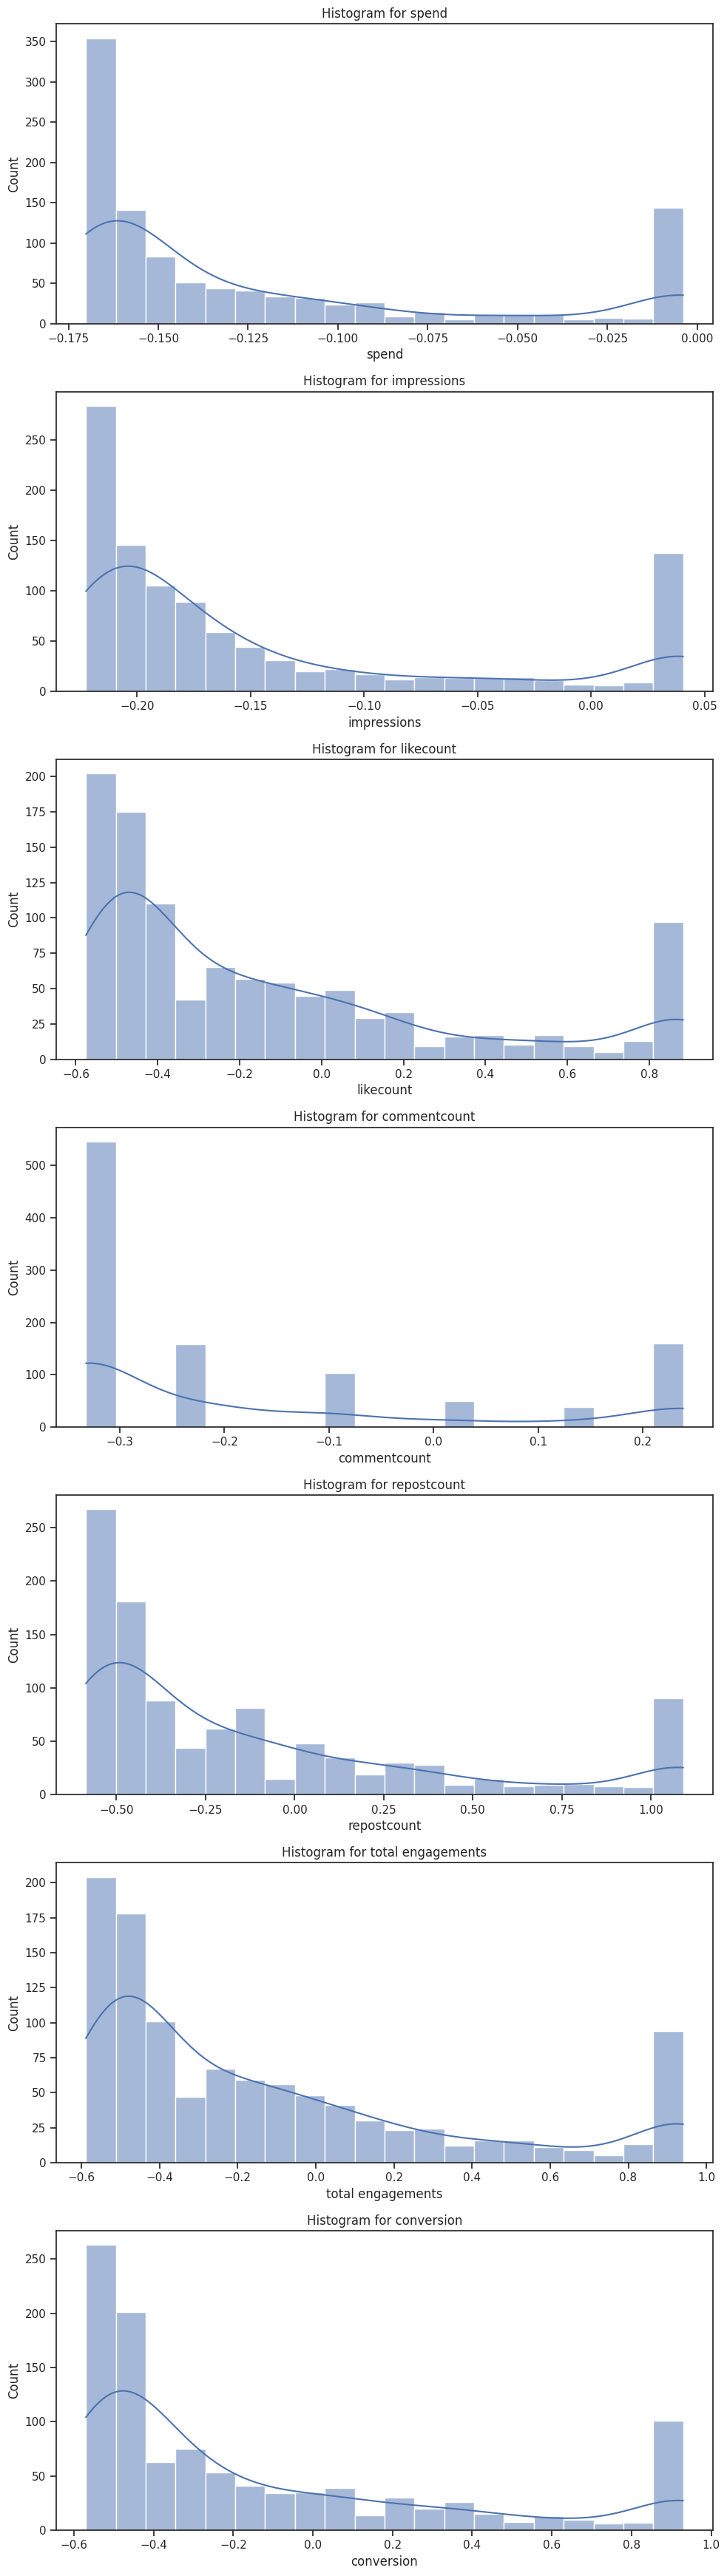

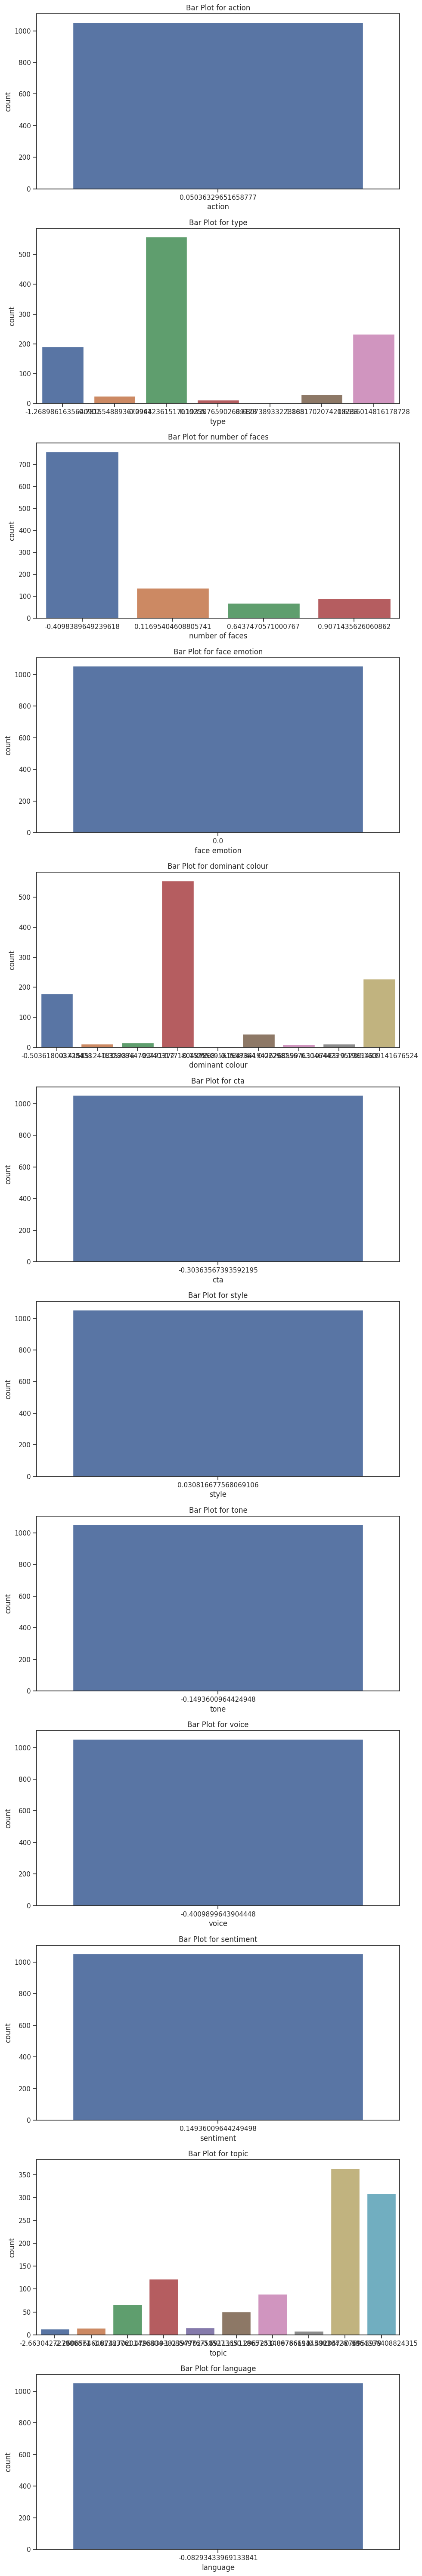

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of performance metrics and creative attributes to analyze
performance_metrics = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']
creative_attributes = ['action', 'type', 'number of faces', 'face emotion', 'dominant colour', 'cta', 'style', 'tone', 'voice', 'sentiment', 'topic', 'language']

# Setting up subplots for numerical variables
fig, axes = plt.subplots(nrows=len(performance_metrics), ncols=1, figsize=(10, 5 * len(performance_metrics)))

# Plotting histograms for numerical variables
for i, metric in enumerate(performance_metrics):
    sns.histplot(data=df, x=metric, ax=axes[i], bins=20, kde=True)
    axes[i].set_title(f'Histogram for {metric}')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Set up subplots for categorical variables
fig, axes = plt.subplots(nrows=len(creative_attributes), ncols=1, figsize=(10, 5 * len(creative_attributes)))

# Plot bar plots for categorical variables
for i, attribute in enumerate(creative_attributes):
    sns.countplot(data=df, x=attribute, ax=axes[i])
    axes[i].set_title(f'Bar Plot for {attribute}')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


**PLOTS BETWEEN EACH PERFORMANCE METRICS & CREATIVE ATTRIBUTES**

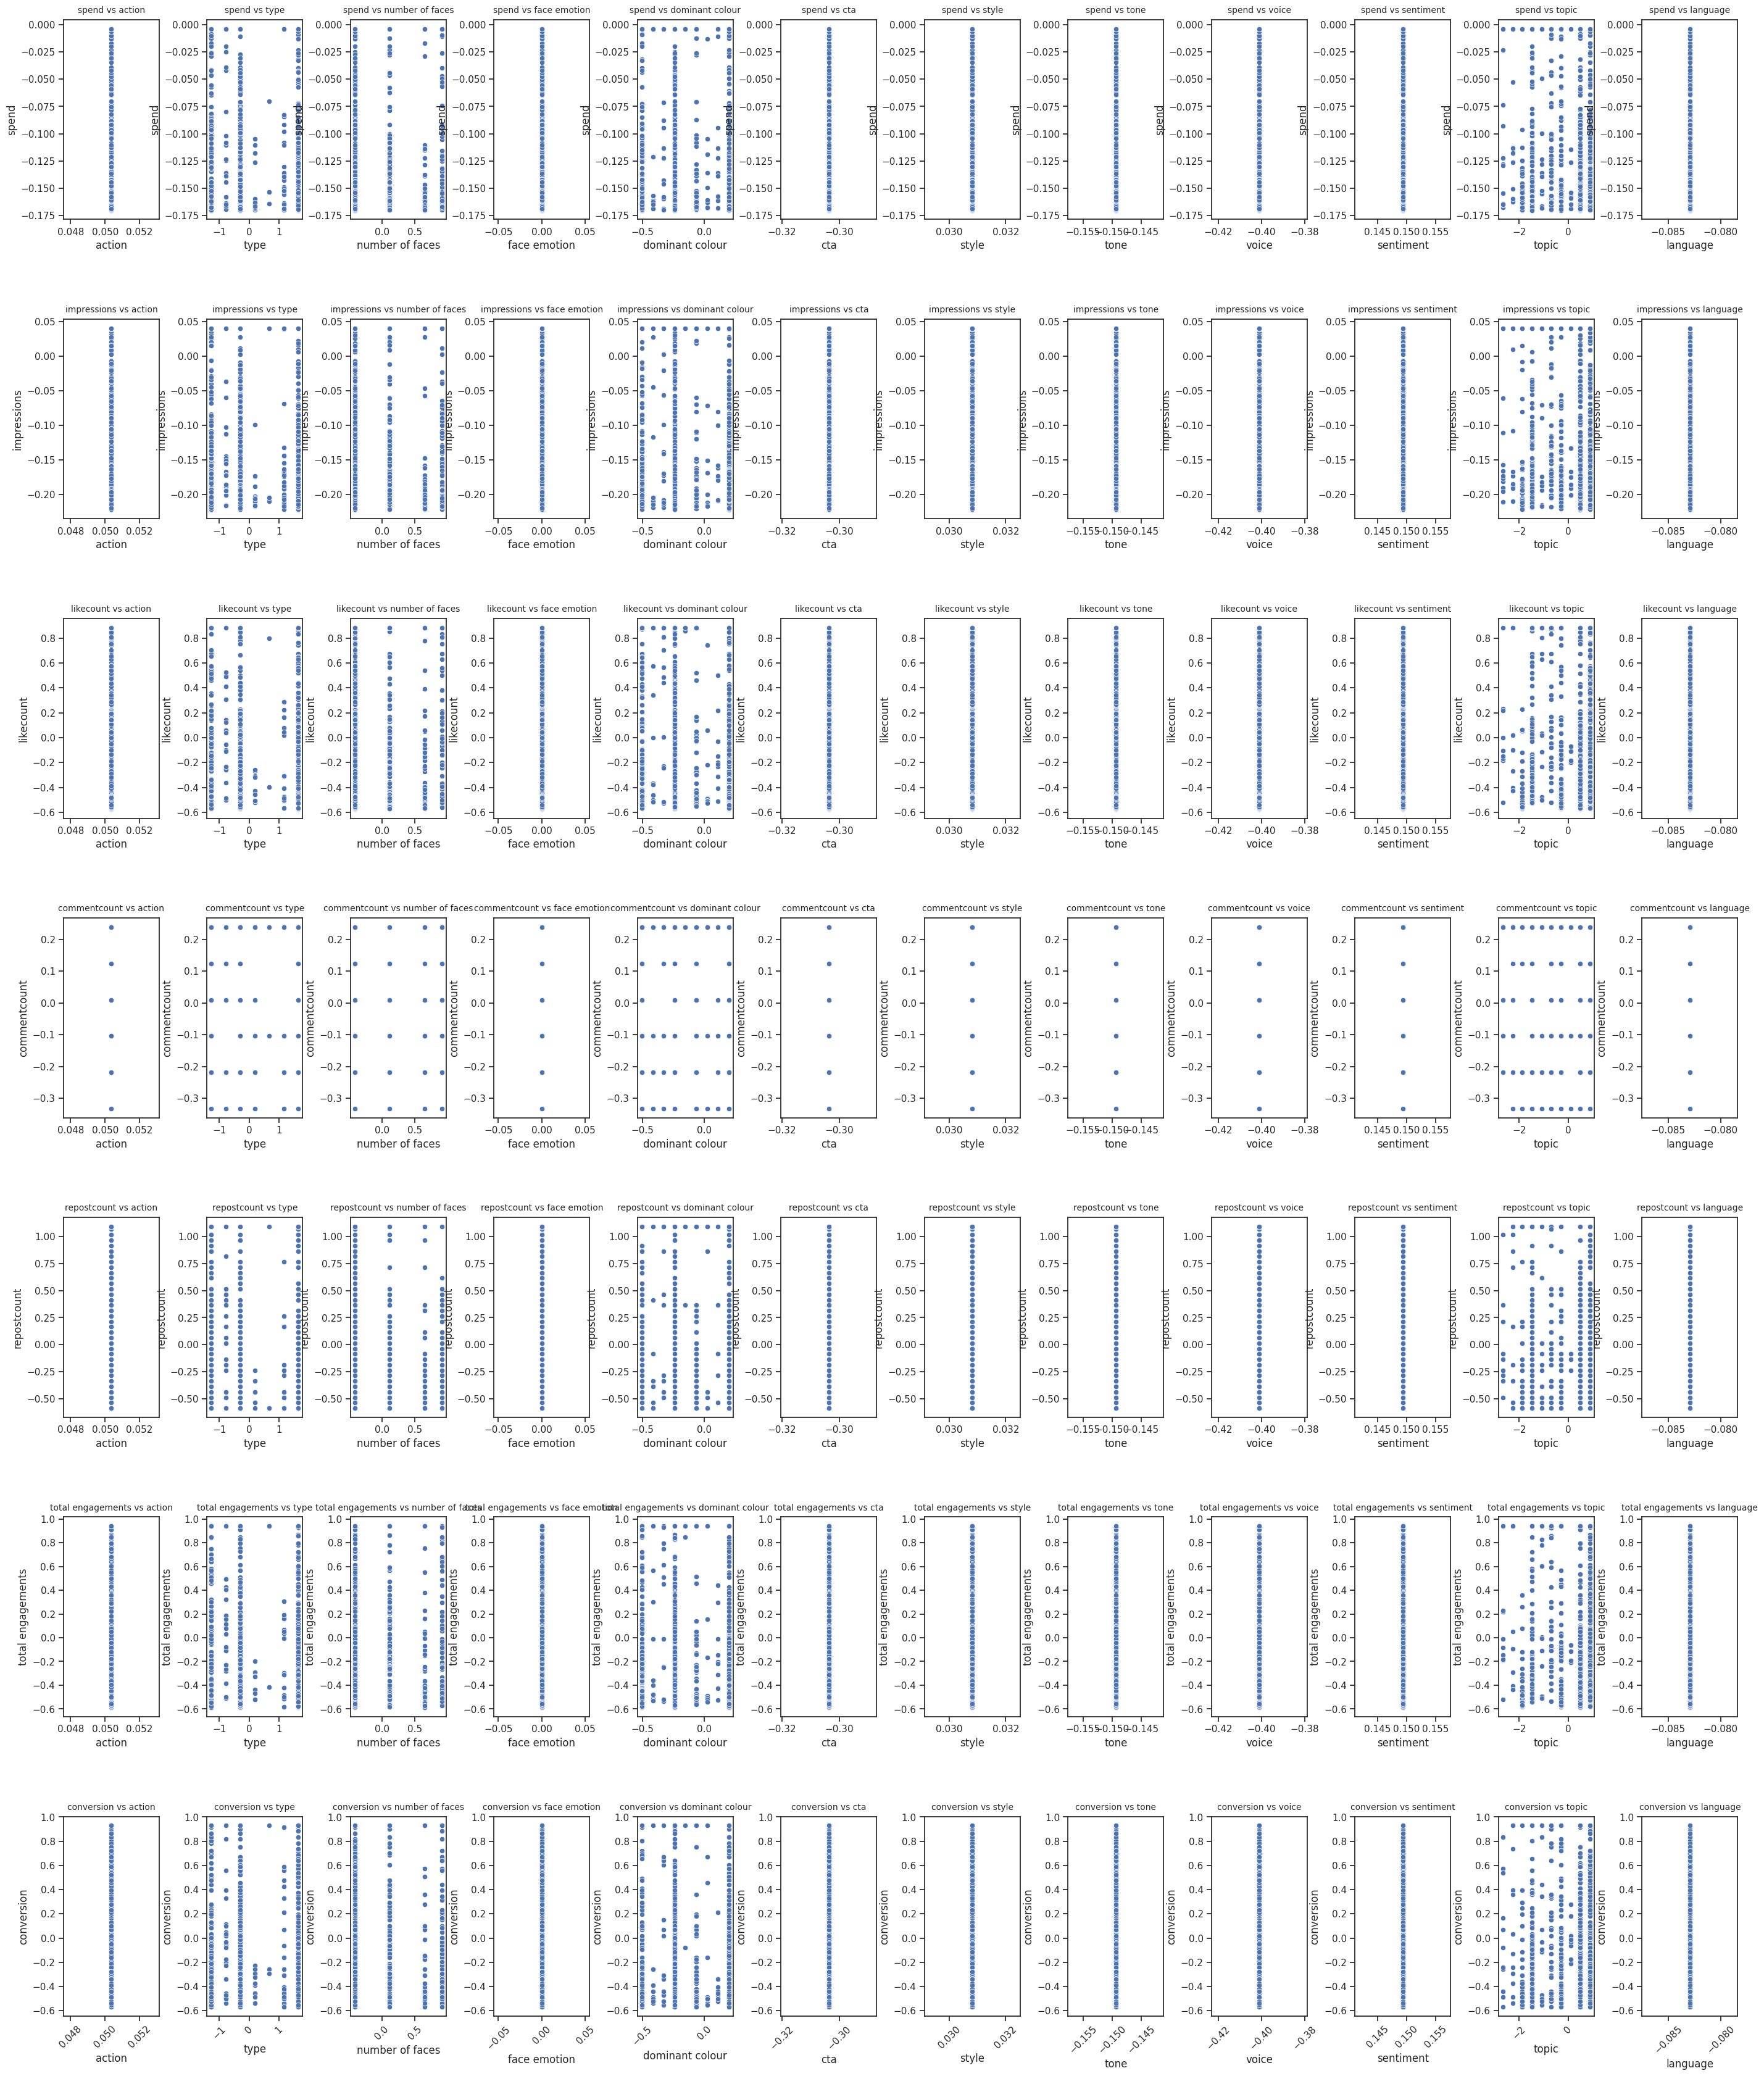

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of performance metrics and creative attributes to analyze
performance_metrics = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']
creative_attributes = ['action', 'type', 'number of faces', 'face emotion', 'dominant colour', 'cta', 'style', 'tone', 'voice', 'sentiment', 'topic', 'language']

# Set up subplots for scatter plots
fig, axes = plt.subplots(nrows=len(performance_metrics), ncols=len(creative_attributes), figsize=(35, 6 * len(performance_metrics)))

# Plot scatter plots for the relationship between performance metrics and creative attributes
for i, metric in enumerate(performance_metrics):
    for j, attribute in enumerate(creative_attributes):
        sns.scatterplot(data=df, x=attribute, y=metric, ax=axes[i, j])
        axes[i, j].set_title(f'{metric} vs {attribute}', pad=8, fontsize=10)  # Adjusted pad and font size

# Adjust layout for better readability
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Rotate x-axis labels for creative attributes
for ax in axes[-1]:
    ax.tick_params(axis='x', rotation=45)

plt.show()


**PAIR PLOTS BETWEEN EACH PERFORMANCE METRICS & CREATIVE ATTRIBUTES FOR BETTER UNDERSTANDING**

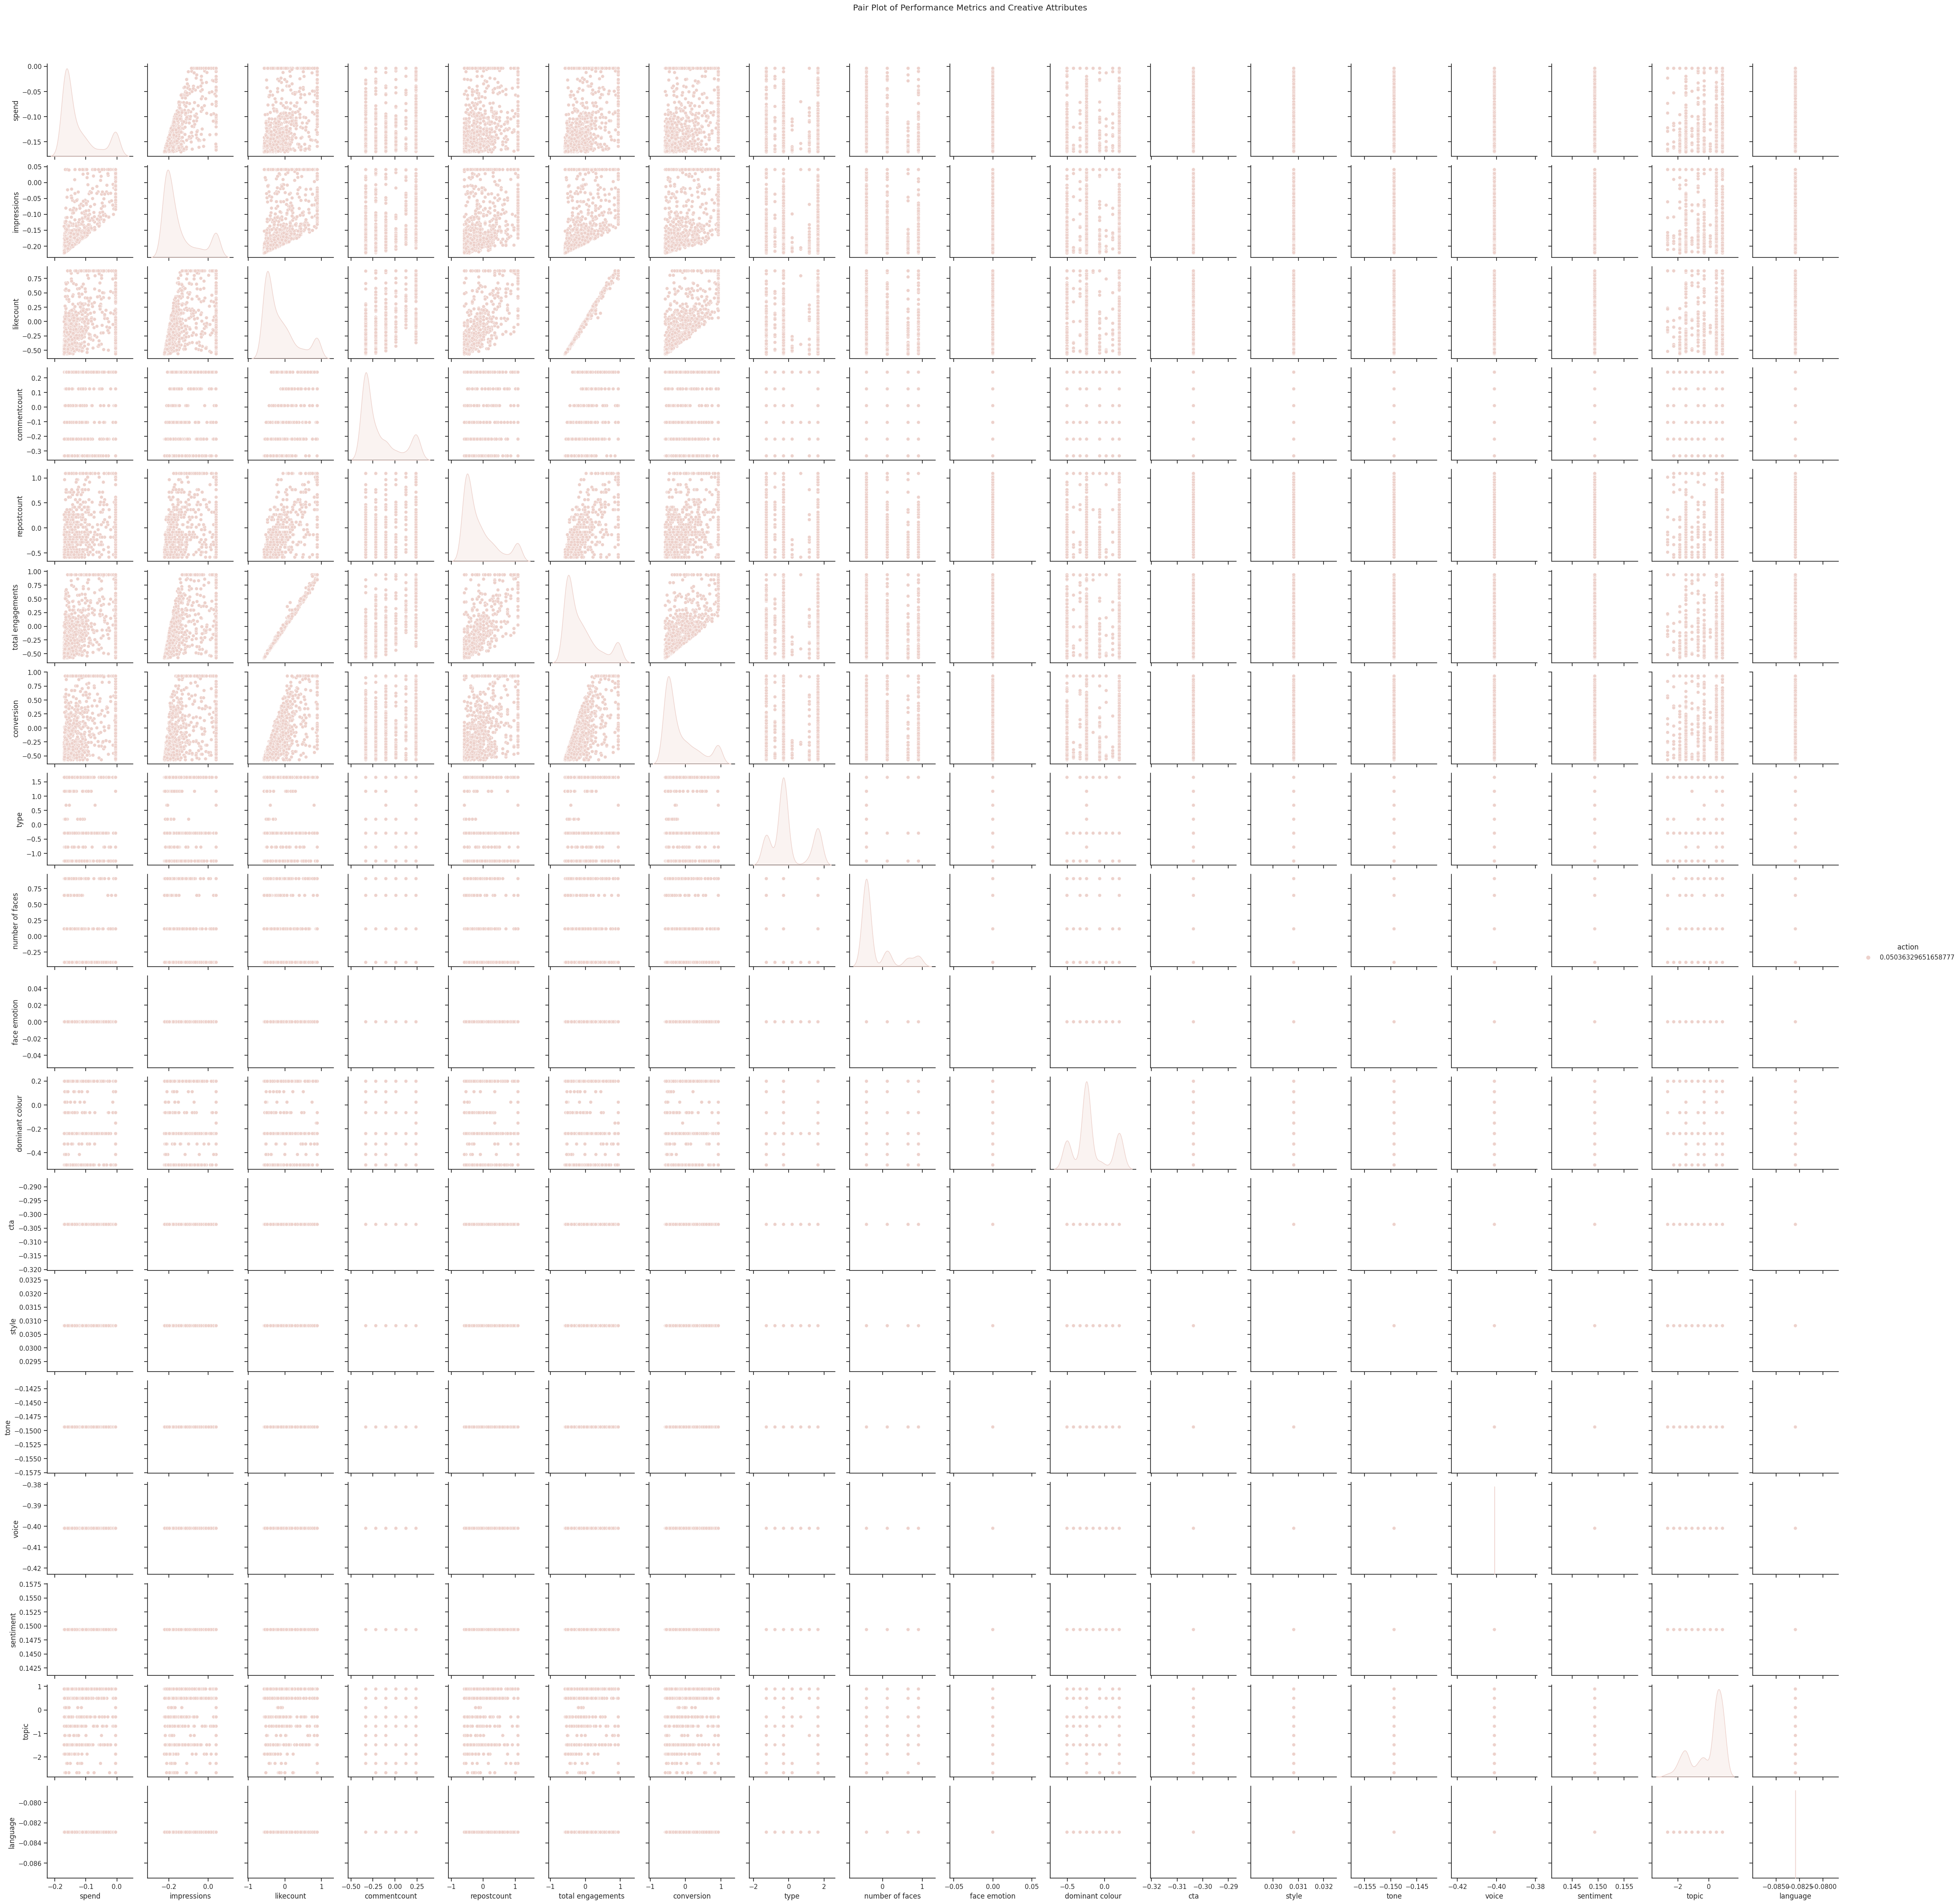

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of performance metrics and creative attributes to analyze
performance_metrics = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']
creative_attributes = ['action', 'type', 'number of faces', 'face emotion', 'dominant colour', 'cta', 'style', 'tone', 'voice', 'sentiment', 'topic', 'language']

# Combine performance metrics and creative attributes into a single list for pair plotting
columns_to_plot = performance_metrics + creative_attributes

# Create a DataFrame with only the selected columns
df_pair_plot = df[columns_to_plot]

# Set a style for the pair plot
sns.set(style="ticks")

# Create a pair plot with hue for categorical variables
sns.pairplot(df_pair_plot, hue='action', diag_kind='kde')
plt.suptitle("Pair Plot of Performance Metrics and Creative Attributes", y=1.02)
plt.show()


**Correlation Heatmap of Performance Metrics and Creative Attributes**

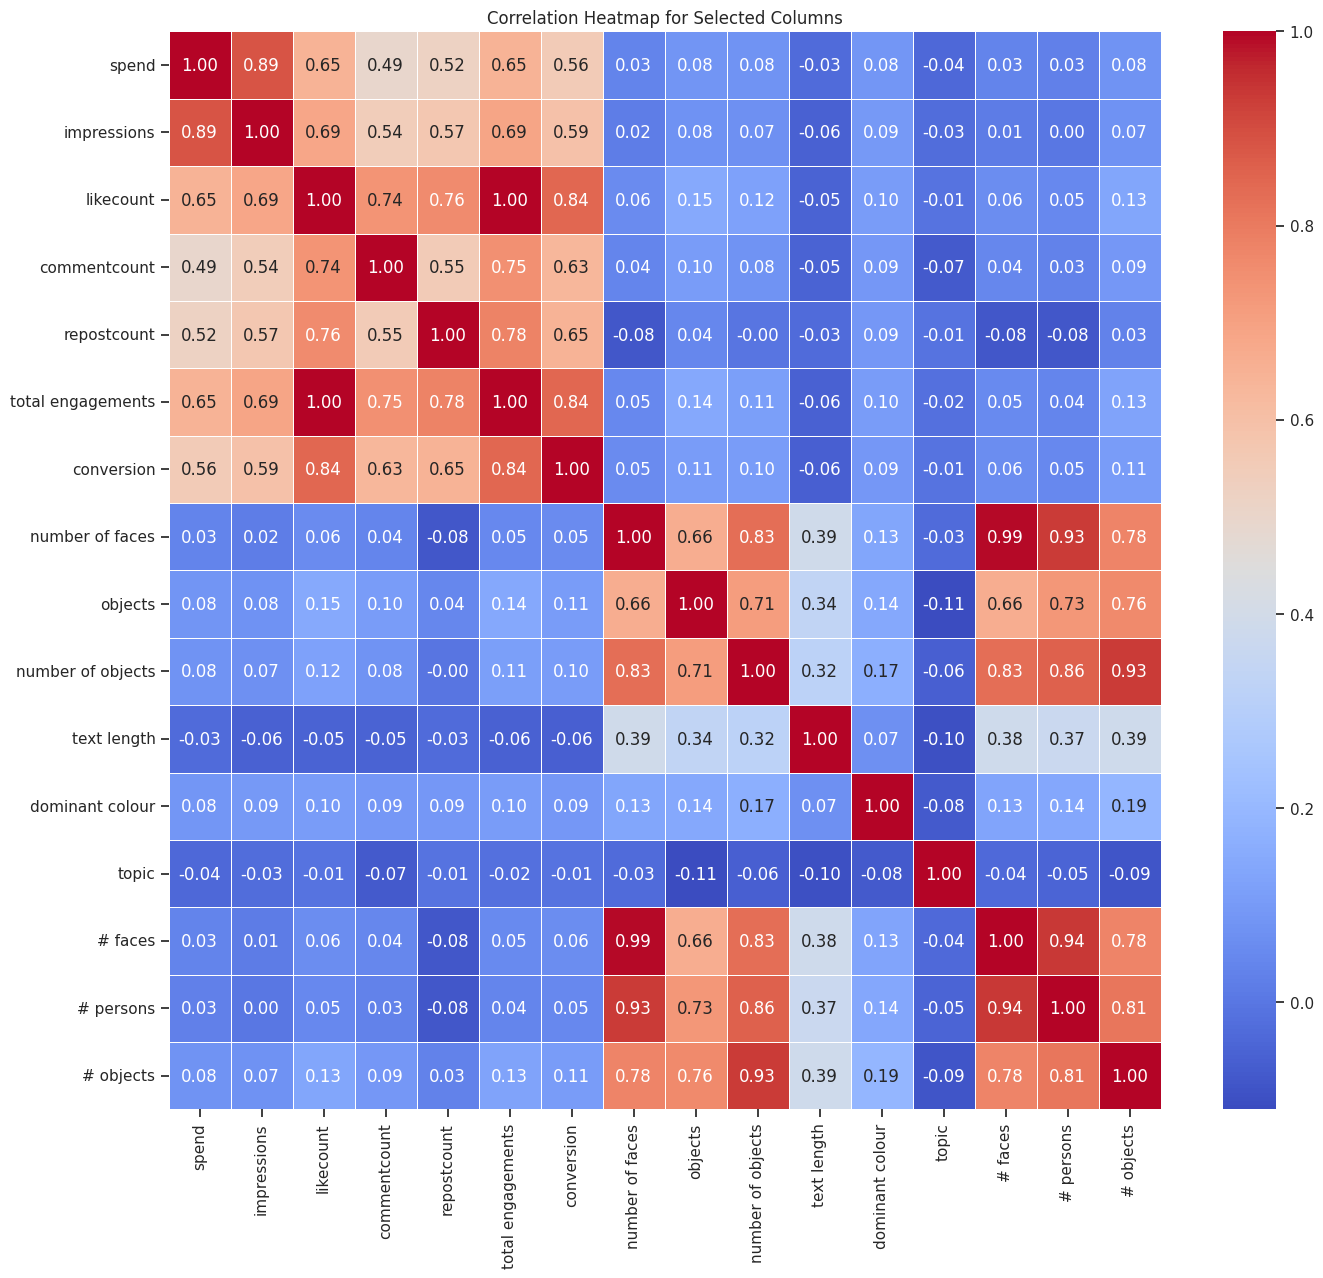

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for the correlation matrix
selected_columns = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion',
                    'number of faces', 'objects', 'number of objects',
                    'text length', 'dominant colour', 'topic',
                    '# faces', '# persons', '# objects']

# Create a DataFrame with only the selected columns
df_selected = df[selected_columns]

# Fill missing values with zeros
df_selected = df_selected.fillna(0)

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set the title
plt.title("Correlation Heatmap for Selected Columns")

# Show the plot
plt.show()


**Building a Random Forest Regressor Model**

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# List of performance metrics and creative attributes to analyze
performance_metrics = ['spend', 'impressions', 'likecount', 'commentcount', 'repostcount', 'total engagements', 'conversion']
creative_attributes = ['action', 'type', 'number of faces', 'face emotion', 'dominant colour', 'cta', 'style', 'tone', 'voice', 'sentiment', 'topic', 'language']

# Combine performance metrics and creative attributes into a single list for the model
columns_for_model = performance_metrics + creative_attributes

# Create a DataFrame with only the selected columns
df_model = df[columns_for_model].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for attribute in creative_attributes:
    if df_model[attribute].dtype == 'object':
        df_model[attribute] = label_encoder.fit_transform(df_model[attribute].astype(str))

# Split the data into features (X) and target (y)
X = df_model[creative_attributes]
y = df_model['total engagements']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.19334409672676084
R-squared: 0.07822152626711032


In [77]:
# Check if all columns in columns_for_model are present in df
missing_columns = set(columns_for_model) - set(df.columns)
print("Missing Columns:", missing_columns)

Missing Columns: set()


In [64]:
print(df.columns)


Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl',
       'sharedposturl', 'created_at', 'size', 'url', 'number of faces',
       'face emotion', 'face position', 'face area percentage %', 'objects',
       'number of objects', 'primary object', 'primary object position',
       'primary object area percentage %', 'secondary object',
       'secondary object position', 'secondary object area percentage %',
       'text', 'text length', 'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 position', 'logo 1 area percentage %', 'logo 2 name',
       'logo 2 position', 'logo 2 area percentage %', 'number of persons',
       'person area %', 'person area', 'style', 'tone', 'voice', 'sentiment',
       'text area %', 'empty space %', 'topic', 'language', '# faces',
       '# persons', '# objects', '# text length'],

**Hyperparameter Tuning**

In [76]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model - Mean Squared Error: {mse_tuned}')
print(f'Tuned Model - R-squared: {r2_tuned}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Model - Mean Squared Error: 0.17608361774445758
Tuned Model - R-squared: 0.16051179652393144
